In [274]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [275]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures, OneHotEncoder
from scipy.sparse import hstack
from scipy.sparse import csr_matrix
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential


samp = pd.read_csv('/content/drive/MyDrive/dataset/sample_submission.csv')
train = pd.read_csv('/content/drive/MyDrive/dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/dataset/test.csv')

In [276]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249698 entries, 0 to 2249697
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PRODUCT_ID       int64  
 1   TITLE            object 
 2   BULLET_POINTS    object 
 3   DESCRIPTION      object 
 4   PRODUCT_TYPE_ID  int64  
 5   PRODUCT_LENGTH   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 103.0+ MB


In [277]:
train.isnull().sum()

PRODUCT_ID               0
TITLE                   12
BULLET_POINTS       837364
DESCRIPTION        1157381
PRODUCT_TYPE_ID          0
PRODUCT_LENGTH           0
dtype: int64

In [278]:
train.columns.to_list()

['PRODUCT_ID',
 'TITLE',
 'BULLET_POINTS',
 'DESCRIPTION',
 'PRODUCT_TYPE_ID',
 'PRODUCT_LENGTH']

In [279]:
y = train['PRODUCT_LENGTH']
train.drop(['PRODUCT_LENGTH'], axis=1, inplace=True)

In [280]:
cat_cols = train.select_dtypes(include=['object']).columns.to_list()
num_cols = train.select_dtypes(exclude=['object']).columns.to_list()

In [281]:
from scipy.stats import mode

for i in train.columns.to_list():
  if i in cat_cols:
    train[i].fillna(train[i].value_counts().idxmax(), inplace=True)
  else:
    train[i].fillna(np.mean(train[i]), inplace=True)

In [282]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249698 entries, 0 to 2249697
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   PRODUCT_ID       int64 
 1   TITLE            object
 2   BULLET_POINTS    object
 3   DESCRIPTION      object
 4   PRODUCT_TYPE_ID  int64 
dtypes: int64(2), object(3)
memory usage: 85.8+ MB


In [283]:
train.isnull().sum()

PRODUCT_ID         0
TITLE              0
BULLET_POINTS      0
DESCRIPTION        0
PRODUCT_TYPE_ID    0
dtype: int64

In [284]:
len(train)

2249698

In [285]:
from scipy.stats import mode

In [286]:
oe = OneHotEncoder(handle_unknown='infrequent_if_exist')
ms = RobustScaler()

In [287]:
train_cat = train.select_dtypes(include=['object'])
train_num = train.select_dtypes(exclude=['object'])
test_cat = test.select_dtypes(include=['object'])
test_num = test.select_dtypes(exclude=['object'])

In [288]:
del train
del test

In [289]:
new_train_cat = oe.fit_transform(train_cat)
new_test_cat = oe.transform(test_cat)

In [290]:
new_train_num = ms.fit_transform(train_num)
new_test_num = ms.transform(test_num)
"""for col_index in range(new_test_num.shape[1]):
  train_col_means = np.nanmean(new_train_num, axis=0)
  test_col_means = np.nanmean(new_test_num, axis=0)"""


'for col_index in range(new_test_num.shape[1]):\n  train_col_means = np.nanmean(new_train_num, axis=0)\n  test_col_means = np.nanmean(new_test_num, axis=0)'

In [291]:
del train_cat
del train_num
del test_cat
del test_num

In [292]:
tr_num = csr_matrix(new_train_num)
train_sparse = hstack([tr_num, new_train_cat])

In [293]:
train_sparse.shape

(2249698, 3921369)

In [294]:
te_num = csr_matrix(new_test_num)
test_sparse = hstack([te_num, new_test_cat])

In [295]:
test_sparse.shape

(734736, 3921369)

In [296]:
print(train_sparse)

  (0, 0)	0.28353900418669253
  (0, 1)	-0.20508666774663858
  (0, 209800)	1.0
  (0, 2661102)	1.0
  (0, 3810604)	1.0
  (1, 0)	0.781804707614318
  (1, 1)	-0.026081321885630972
  (1, 1200571)	1.0
  (1, 2603081)	1.0
  (1, 3810604)	1.0
  (2, 0)	0.8430210133994145
  (2, 1)	0.7485825368540417
  (2, 1408669)	1.0
  (2, 2677297)	1.0
  (2, 3748305)	1.0
  (3, 0)	0.06292462288125714
  (3, 1)	0.012959663048760733
  (3, 87195)	1.0
  (3, 2689967)	1.0
  (3, 3380672)	1.0
  (4, 0)	-0.8099597984259101
  (4, 1)	0.5177385387979913
  (4, 1915249)	1.0
  (4, 2588845)	1.0
  (4, 3810604)	1.0
  :	:
  (2249693, 0)	0.6145874758940437
  (2249693, 1)	0.015065608294184352
  (2249693, 1335912)	1.0
  (2249693, 2232915)	1.0
  (2249693, 3810604)	1.0
  (2249694, 0)	0.8440515326225615
  (2249694, 1)	0.08051190669042604
  (2249694, 1796)	1.0
  (2249694, 3133750)	1.0
  (2249694, 3318480)	1.0
  (2249695, 0)	0.3252287359652541
  (2249695, 1)	-0.2173983476429613
  (2249695, 1019478)	1.0
  (2249695, 2489969)	1.0
  (2249695, 387069

In [297]:
model = Sequential([
    Dense(units=10, activation='relu',input_shape=[2]),
    Dense(units = 20, activation='relu'),
    Dense(units = 20, activation='relu'),
    Dense(units = 30, activation='relu'),
    Dense(units = 40, activation='relu'),
    Dense(units = 40, activation='relu'),
    Dense(units = 30, activation='relu'),
    Dense(units = 20, activation='relu'),
    Dense(units = 1)
])

In [298]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [299]:
!pip install XGBoost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: >

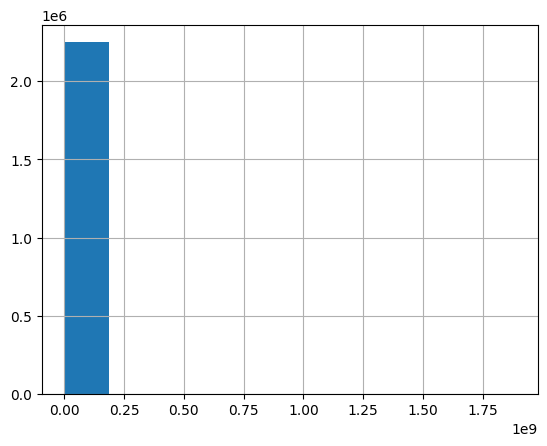

In [300]:
y.hist()

array([[<Axes: title={'center': 'PRODUCT_LENGTH'}>]], dtype=object)

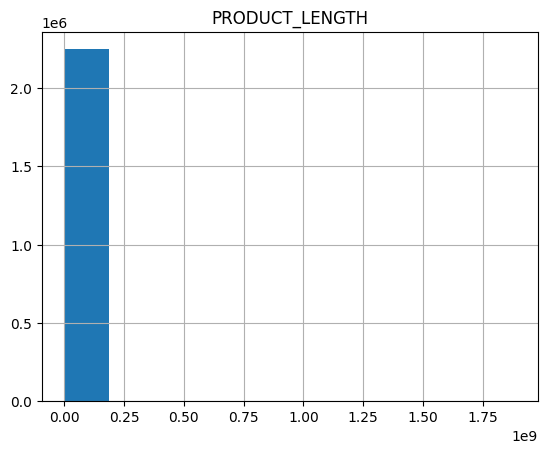

In [301]:
from scipy.stats.mstats import normaltest
pd.DataFrame(y).hist()

In [302]:
normaltest(pd.DataFrame(y))

/usr/local/lib/python3.9/dist-packages/scipy/stats/_mstats_basic.py:3015: RuntimeWarning: invalid value encountered in sqrt
  sqrtbeta1 = 6.0*(n*n-5*n+2)/((n+7)*(n+9)) * np.sqrt((6.0*(n+3)*(n+5)) /


NormaltestResult(statistic=masked_array(data=[--],
             mask=[ True],
       fill_value=1e+20,
            dtype=float64), pvalue=array([0.]))

In [303]:
from scipy.stats import boxcox
bc_result = boxcox(y)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [304]:
lam

0.03801480437319033

In [305]:
boxcox_medv

array([8.89454703, 6.70874764, 7.52420528, ..., 8.13751765, 9.3124665 ,
       8.8129016 ])

(array([1.397500e+04, 2.720250e+05, 1.877381e+06, 8.344800e+04,
        2.278000e+03, 3.170000e+02, 2.480000e+02, 1.900000e+01,
        5.000000e+00, 2.000000e+00]),
 array([ 0.        ,  3.29396908,  6.58793817,  9.88190725, 13.17587633,
        16.46984542, 19.7638145 , 23.05778358, 26.35175267, 29.64572175,
        32.93969084]),
 <BarContainer object of 10 artists>)

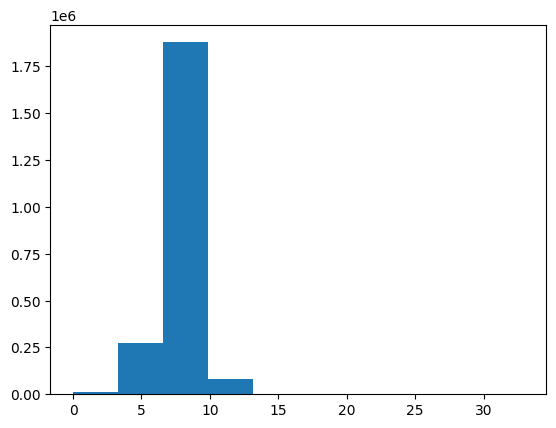

In [306]:
import matplotlib.pyplot as plt
plt.hist(boxcox_medv)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f37fc13a670>,
 'caps': [<matplotlib.lines.Line2D at 0x7f37fc13aa90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f37fc13a3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f37fc13afd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f37fc13b2b0>],
 'means': []}

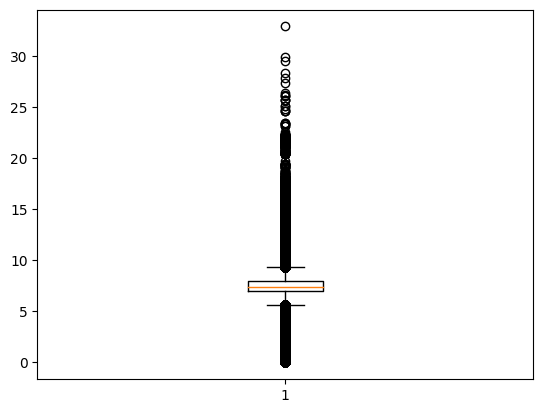

In [307]:
plt.boxplot(boxcox_medv)

In [308]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=26, learning_rate=0.1)
model.fit(train_sparse,boxcox_medv )

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=26, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [309]:
y_pred = model.predict(test_sparse)
from scipy.special import inv_boxcox
y_pred = inv_boxcox(y_pred, lam)
y_pred

array([ 471.60037, 2031.6063 ,  620.90436, ...,  412.4429 ,  513.6253 ,
        433.1077 ], dtype=float32)

In [310]:
len(y_pred)

734736

In [311]:
test=pd.read_csv("/content/drive/MyDrive/dataset/test.csv")
sub = test.drop(['TITLE', 'PRODUCT_TYPE_ID','BULLET_POINTS', 'DESCRIPTION'], axis=1)
sub['PRODUCT_LENGTH'] = y_pred
sub.set_index('PRODUCT_ID', inplace=True)
sub.to_csv('submission.csv', header=True)

In [312]:
sub

,PRODUCT_LENGTH
PRODUCT_ID,
604373,471.600372
1729783,2031.606323
1871949,620.904358
1107571,434.812469
624253,471.600372
...,...
921419,568.819336
2456362,410.149902
841529,412.442902
